# 频率域滤波
## 傅里叶变换

复习傅里叶级数、傅里叶变换
$\sum_1$

这里等后来再补


## 参考学习

主要使用OpenCV、Numpy以及提供的对应方法。

图片来源为冈萨雷斯数字图像处理提供的图像。

[OpenCV关于Fourier Transform应用的示例](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform)


In [34]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
from math import sqrt

eps = np.finfo(float).eps

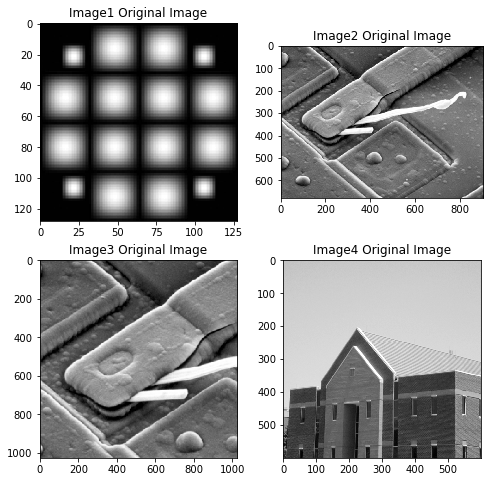

In [2]:
# 选取部分测试照片并显示
img1 = cv2.imread('./DIP3E_CH07_Original_Images/Fig0723(a).tif',0)
img2 = cv2.imread('./DIP3E_Original_Images_CH04/Fig0429(a)(blown_ic).tif',0)
img3 = cv2.imread('./DIP3E_Original_Images_CH04/Fig0431(d)(blown_ic_crop).tif',0)
img4 = cv2.imread('./DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif',0)
plt.figure(figsize=(8,8))
ax1 = plt.subplot(221)
ax1.set_title("Image1 Original Image")
ax1.imshow(img1,cmap = "gray")
ax2 = plt.subplot(222)
ax2.set_title("Image2 Original Image")
ax2.imshow(img2,cmap = "gray")
ax3 = plt.subplot(223)
ax3.set_title("Image3 Original Image")
ax3.imshow(img3,cmap = "gray")
ax4 = plt.subplot(224)
ax4.set_title("Image4 Original Image")
ax4.imshow(img4,cmap = "gray")

plt.show()

## 原理概述

> For a sinusoidal signal, $x(t) = A \sin(2 \pi ft)$, we can say $f$ is the frequency of signal, and if its frequency domain is taken, we can see a spike at $f$. If signal is sampled to form a discrete signal, we get the same frequency domain, but is periodic in the range  $[- \pi, \pi]$ or $[0,2\pi]$ (or $[0,N]$ for N-point DFT). You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image

中文翻译：对于正弦信号$x(t) = A \sin(2 \pi ft)$，$f$是信号的频率，如果我们考虑它的频域，我们则可以再$f$处看到一个峰值，如果信号采样形成离散信号，我们得到了相同的频域，但是频域在 $[- \pi, \pi]$ 或者 $[0,2\pi]$ （又或者 $[0,N]$ 对于一个$N$点DFT）。~~划重点！！~~**你可以把一幅图像看作是在两个方向上采样的信号。在X和Y方向上进行傅里叶变换就得到了图像的频率表示。**

## 使用Numpy实现DFT

首先使用Numpy提供的工具实现傅里叶变换，Numpy提供了一个FFT包`numpy.fft`来做这些。

- `numpy.fft.fft2(a, s=None, axes=(-2, -1), norm=None)` 提供了计算二维DFT的方法，参数描述：
    - `a : array_like` 输入数组，可以为复数，灰度图。
    - `s : sequence of ints, optional` 决定输出数组的大小，如果输入图像的大小大于输入图像的大小，则在计算FFT之前用零填充输入图像。如果它小于输入图像，输入图像将被裁剪。
    - `axes : sequence of ints, optional` 没看懂，原始这么写的：Axes over which to compute the FFT. If not given, the last two axes are used. A repeated index in axes means the transform over that axis is performed multiple times. A one-element sequence means that a one-dimensional FFT is performed.
    - `norm : {None, "ortho"}, optional` 1.10.0.新加入，归一化方式，默认为None。

当获得了频域的结果，由于图像直流分量（DC component）在图片的左上角，如果要使其居中，则需要在两个方向上移动结果，Nuumpy也提供了对应的函数。

- `numpy.fft.fftshift(x, axes=None)` 提供了将零频率分量移到频谱的中心的方法，对于二维输入，交换第一和第三象限，第二和第四象限，参数描述：
    - `x : array_like` 输入数组
    - `axes : int or shape tuple, optional` 要移动的轴。 默认值为None
    
这样在频率变换后，我们也可找到幅度谱（magnitude spectrum）




## 使用OpenCV实现DFT

OpenCV也提供的工具用于实现傅里叶变换，分别是`cv2.dft()`和`cv2.idft()`函数。返回有两个通道，第一个通道是结果的实部，第二个通道是结果的虚部。所以在计算其幅度的时候需要先手动转化一次。

显示各图像对应的频谱
其中图三的频谱有些奇怪


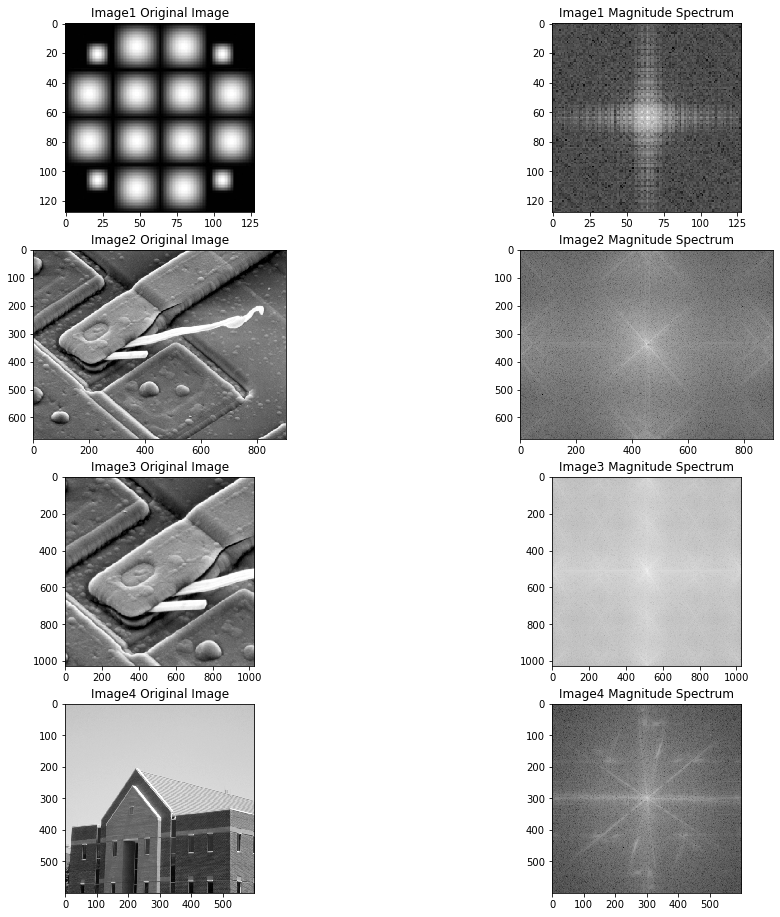

In [3]:
## Magnitude spectrum


## 使用Numpy实现DFT
## 进行二维DFT变换
f_img1 = np.fft.fft2(img1)
## 对换象限
fshift_img1 = np.fft.fftshift(f_img1)
## 幅度谱 对数化？
manitude_img1 = 20*np.log(np.abs(fshift_img1))
## img2图像也做相同的处理
f_img2 = np.fft.fft2(img2)
fshift_img2 = np.fft.fftshift(f_img2)
manitude_img2 = 20*np.log(np.abs(fshift_img2))

## 使用OpenCV实现DFT
f_img3 = cv2.dft(np.float32(img3), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift_img3 = np.fft.fftshift(f_img3)
# manitude_img3 = 20*np.log(np.abs(fshift_img3))
# 手动转化计算magnitude
manitude_img3 = 20*np.log(cv2.magnitude(fshift_img3[:,:,0],fshift_img3[:,:,1])+1e-15)


## 使用OpenCV实现DFT
f_img4 = cv2.dft(np.float32(img4), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift_img4 = np.fft.fftshift(f_img4)
manitude_img4 = 20*np.log(cv2.magnitude(fshift_img4[:,:,0],fshift_img4[:,:,1]))

print("显示各图像对应的频谱")
print("其中图三的频谱有些奇怪")

plt.figure(figsize=(16,16))
ax1 = plt.subplot(421)
ax1.set_title("Image1 Original Image")
ax1.imshow(img1, cmap = "gray")
ax2 = plt.subplot(422)
ax2.set_title("Image1 Magnitude Spectrum")
ax2.imshow(manitude_img1, cmap = "gray")
ax3 = plt.subplot(423)
ax3.set_title("Image2 Original Image")
ax3.imshow(img2, cmap = "gray")
ax4 = plt.subplot(424)
ax4.set_title("Image2 Magnitude Spectrum")
ax4.imshow(manitude_img2, cmap = "gray")
ax5 = plt.subplot(425)
ax5.set_title("Image3 Original Image")
ax5.imshow(img3, cmap = "gray")
ax6 = plt.subplot(426)
ax6.set_title("Image3 Magnitude Spectrum")
ax6.imshow(manitude_img3, cmap = "gray")
ax7 = plt.subplot(427)
ax7.set_title("Image4 Original Image")
ax7.imshow(img4, cmap = "gray")
ax8 = plt.subplot(428)
ax8.set_title("Image4 Magnitude Spectrum")
ax8.imshow(manitude_img4, cmap = "gray")
plt.show()

In [4]:
print(np.shape(fshift_img3))

(1026, 1026, 2)


根据运行结果不难验证OpenCV提供的cv.dft()确实返回结果为表示实部和虚部的双通道，np就没有这些顾虑，毕竟科学计算专门的库，复数支持很自然。

## 频率域滤波

### 高通滤波HPF

对于给定的图片对频域中心（低频部分）赋值为0，通过这种掩膜方式（masking）过滤掉低频部分从而实现HPF。

### 低通滤波LPF

同理，给定图片保留频率中心部分（低频部分）赋值为1，剩下的通过掩膜过滤掉，从而实现LPF。


In [35]:
def getFilterPassImg(input_img : np.array, filter_type : str , filter_size = 20):
    assert filter_type in ("lpf","hpf")
    f_img = np.fft.fft2(input_img)
    shift_img = np.fft.fftshift(f_img)
    
    def getMask(input_shift_img : np.array , mask_type , mask_size):
        rows,cols = input_shift_img.shape
        crow,ccol = rows//2,cols//2
        if(mask_type == "hpf"):
            mask = np.ones(input_shift_img.shape)
            mask[crow - mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 0.0
        else :
            mask = np.zeros(input_shift_img.shape)
            mask[crow - mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1.0
        return mask
    
    mask_shift_img = getMask(shift_img, filter_type ,filter_size)
    new_shift_img = mask_shift_img*shift_img
    new_manitude_img = 20*np.log(np.abs(new_shift_img)+eps)
    
    new_f_img = np.fft.ifftshift(new_shift_img)
    new_img = np.fft.ifft2(new_f_img)
    new_img = np.abs(new_img)
    return new_img,new_manitude_img

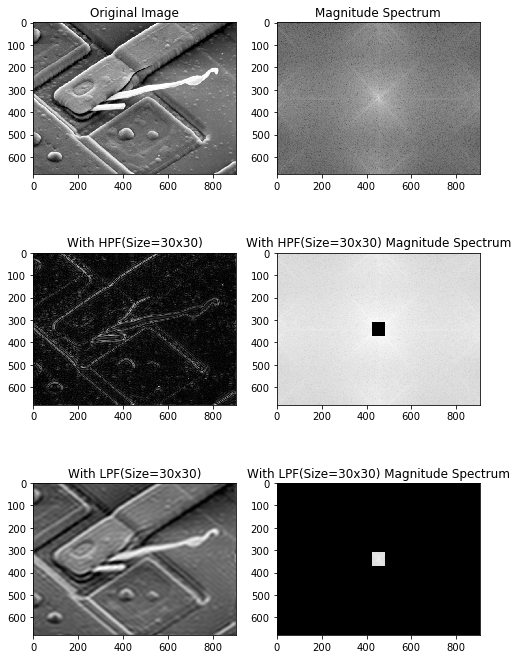

In [36]:
hpf_img2,hpf_manitude_img2 = getFilterPassImg(img2,"hpf",30)
lpf_img2,lpf_manitude_img2 = getFilterPassImg(img2,"lpf",30)
plt.figure(figsize=(8,12))


ax1 = plt.subplot(321)
ax1.set_title("Original Image")
ax1.imshow(img2, cmap = "gray")
ax2 = plt.subplot(322)
ax2.set_title("Magnitude Spectrum")
ax2.imshow(manitude_img2, cmap = "gray")
ax3 = plt.subplot(323)
ax3.set_title("With HPF(Size=30x30)")
ax3.imshow(hpf_img2,cmap = "gray")
ax4 = plt.subplot(324)
ax4.set_title("With HPF(Size=30x30) Magnitude Spectrum")
ax4.imshow(hpf_manitude_img2,cmap = "gray")
ax5 = plt.subplot(325)
ax5.set_title("With LPF(Size=30x30)")
ax5.imshow(lpf_img2,cmap = "gray")
ax6 = plt.subplot(326)
ax6.set_title("With LPF(Size=30x30) Magnitude Spectrum")
ax6.imshow(lpf_manitude_img2,cmap = "gray")
plt.show()